In [1]:
import collections

import pandas
from matplotlib import pyplot as plt
from tqdm import tqdm
from pathlib import Path
import numpy as np
import re

## Figurenhäufigkeit in den Werken

In [2]:
files = list(Path('llpro_output').glob('*'))
files

[PosixPath('llpro_output/DEU073_Schicksale_einer_Seele.txt.tsv'),
 PosixPath('llpro_output/DEU066_Der_Stechlin.txt.tsv'),
 PosixPath('llpro_output/DEU007_Die_Mappe_meines_Urgroßvaters.txt.tsv'),
 PosixPath('llpro_output/DEU039_Problematische_Naturen_Erste_Abtheilung.txt.tsv'),
 PosixPath('llpro_output/DEU045_Witiko.txt.tsv'),
 PosixPath('llpro_output/DEU096_Der_Golem.txt.tsv'),
 PosixPath('llpro_output/DEU011_Soll_und_Haben.txt.tsv'),
 PosixPath('llpro_output/DEU005_Der_Sonnenwirt.txt.tsv'),
 PosixPath('llpro_output/DEU059_Irrungen_Wirrungen.txt.tsv'),
 PosixPath('llpro_output/DEU079_Die_Aufzeichnungen_des_Malte_Laurids_Brigge.txt.tsv'),
 PosixPath('llpro_output/DEU030_Die_verlorene_Handschrift.txt.tsv'),
 PosixPath('llpro_output/DEU094_Der_Weg_ins_Freie.txt.tsv'),
 PosixPath('llpro_output/DEU013_Barfüßele.txt.tsv'),
 PosixPath('llpro_output/DEU061_Größenwahn_ELTeC_ausgabe.txt.tsv'),
 PosixPath('llpro_output/DEU072_Im_alten_Eisen.txt.tsv'),
 PosixPath('llpro_output/DEU097_Wellen.txt.ts

In [3]:
text = files[1]

annotated = pandas.read_csv(text, sep='\t')
annotated.head()

,i,text,orig,is_sent_start,is_para_start,is_section_start,pos,tag,lemma,morph,dep,head,speech,entity,character,coref_clusters,scene_id,scene_label,event_id,event_label
0,0,Im,Im,1,1,1,ADP,APPRART,in,AdpType=Prep|Case=Dat|Gender=Masc|Number=Sing|...,pp,12,_,O,O,_,0,Nonscene,0,stative_event
1,1,Norden,Norden,0,0,0,NOUN,NN,Norden,Case=Dat|Gender=Masc|Number=Sing,pn,0,_,O,O,0,0,Nonscene,0,stative_event
2,2,der,der,0,0,0,DET,ART,der,Case=Gen|Gender=Fem|Number=Sing|PronType=Art,det,3,_,O,O,_,0,Nonscene,0,stative_event
3,3,Grafschaft,Grafschaft,0,0,0,NOUN,NN,Grafschaft,Case=Gen|Gender=Fem|Number=Sing,gmod,1,_,O,O,_,0,Nonscene,0,stative_event
4,4,Ruppin,Ruppin,0,0,0,PROPN,NE,Ruppin,Case=Nom|Gender=*|Number=Sing,app,3,_,B-LOC,O,_,0,Nonscene,0,stative_event


In [22]:
def get_character_freq(annotated):
    character_mentions = []

    cur_character = []
    for id, row in tqdm(annotated.iterrows(), total=len(annotated)):
        if row['character'] == 'B-PER':
            if len(cur_character) > 0 and any(annotated.loc[cur_character, 'entity'].str.contains('PER')):
                character_mentions.append(' '.join(annotated.loc[cur_character, 'lemma'].astype(str)))
            cur_character = [id]
        if row['character'] == 'I-PER':
            cur_character.append(id)

    char_counter = collections.Counter()
    char_counter.update([character_str for character_str in character_mentions])

    return pandas.DataFrame(char_counter.most_common(), columns=['mention', 'freq'])


In [23]:
output = []

for text in files:
    print(text)
    annotated = pandas.read_csv(text, sep='\t')
    freqs = get_character_freq(annotated)

    freqs = freqs[:100] # 100 häufigsten Figuren
    freqs['filename'] = text.name
    output.append(freqs)

llpro_output/DEU073_Schicksale_einer_Seele.txt.tsv


100%|██████████| 104398/104398 [00:07<00:00, 14690.74it/s]


llpro_output/DEU066_Der_Stechlin.txt.tsv


100%|██████████| 154597/154597 [00:12<00:00, 12144.43it/s]


llpro_output/DEU007_Die_Mappe_meines_Urgroßvaters.txt.tsv


100%|██████████| 82269/82269 [00:04<00:00, 16997.49it/s]


llpro_output/DEU039_Problematische_Naturen_Erste_Abtheilung.txt.tsv


100%|██████████| 225288/225288 [00:18<00:00, 12406.32it/s]


llpro_output/DEU045_Witiko.txt.tsv


100%|██████████| 338070/338070 [00:35<00:00, 9515.38it/s] 


llpro_output/DEU096_Der_Golem.txt.tsv


100%|██████████| 90852/90852 [00:05<00:00, 15693.20it/s]


llpro_output/DEU011_Soll_und_Haben.txt.tsv


100%|██████████| 344302/344302 [00:27<00:00, 12383.40it/s]


llpro_output/DEU005_Der_Sonnenwirt.txt.tsv


100%|██████████| 215012/215012 [00:14<00:00, 14528.67it/s]


llpro_output/DEU059_Irrungen_Wirrungen.txt.tsv


100%|██████████| 63354/63354 [00:04<00:00, 13942.68it/s]


llpro_output/DEU079_Die_Aufzeichnungen_des_Malte_Laurids_Brigge.txt.tsv


100%|██████████| 70472/70472 [00:04<00:00, 16936.01it/s]


llpro_output/DEU030_Die_verlorene_Handschrift.txt.tsv


100%|██████████| 307383/307383 [00:23<00:00, 12936.64it/s]


llpro_output/DEU094_Der_Weg_ins_Freie.txt.tsv


100%|██████████| 144741/144741 [00:11<00:00, 12802.87it/s]


llpro_output/DEU013_Barfüßele.txt.tsv


100%|██████████| 74804/74804 [00:05<00:00, 13010.73it/s]


llpro_output/DEU061_Größenwahn_ELTeC_ausgabe.txt.tsv


100%|██████████| 293243/293243 [00:20<00:00, 13967.28it/s]


llpro_output/DEU072_Im_alten_Eisen.txt.tsv


100%|██████████| 64387/64387 [00:04<00:00, 13108.25it/s]


llpro_output/DEU097_Wellen.txt.tsv


100%|██████████| 54751/54751 [00:04<00:00, 12577.04it/s]


llpro_output/DEU038_Der_Hungerpastor.txt.tsv


100%|██████████| 166061/166061 [00:12<00:00, 12807.37it/s]


llpro_output/DEU032_Jürg_Jenatsch.txt.tsv


100%|██████████| 83840/83840 [00:06<00:00, 12868.66it/s]


llpro_output/DEU025_Der_Amerika_Müde.txt.tsv


100%|██████████| 197276/197276 [00:13<00:00, 14247.17it/s]


llpro_output/DEU076_Caspar_Hauser.txt.tsv


100%|██████████| 156609/156609 [00:11<00:00, 13077.72it/s]


In [24]:

pandas.concat(output).to_csv('figurenhäufigkeit.csv', index=False)


## Figurenhäufigkeit/-reihenfolge in den Zusammenfassungen

In [2]:
from flair.models import SequenceTagger

character_tagger = SequenceTagger.load('flair/ner-german-large')

2023-05-25 11:17:48,419 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [3]:
summaries = list(Path('kindler').glob('*'))

In [33]:
from segtok.segmenter import split_single
from flair.data import Sentence

def get_character_freq_from_summary(summary_file):
    summary = open(summary_file).read()
    sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(summary)]
    character_tagger.predict(sentences)
    character_mentions = []
    for sent in sentences:
        for label in sent.labels:
            if label.value == 'PER':
                # immer nur Vornamen
                character_mentions.append(label.data_point[0].text)
                
    freqs = pandas.DataFrame(collections.Counter(character_mentions).most_common(), columns=['mention', 'freq'])
    freqs['filename'] = summary_file.name
    freqs['occurence_order'] = freqs['mention'].apply(lambda x: character_mentions.index(x)+1)
    return freqs

In [34]:
output = []

for file in tqdm(summaries):
    df = get_character_freq_from_summary(file)
    output.append(df)

100%|██████████| 19/19 [12:32<00:00, 39.60s/it]


In [37]:
pandas.concat(output).to_csv('figurenhäufigkeit_kindler.csv', index=False)

## Auswertung

In [151]:
freq_texts = pandas.read_csv('figurenhäufigkeit.csv', index_col=None)
freq_summaries = pandas.read_csv('figurenhäufigkeit_kindler.csv', index_col=None)
gold = pandas.read_csv('Romanauswahl_Hauptfiguren_Goldstandard.csv', index_col=None, sep=';').iloc[:10]

In [152]:
freq_texts[freq_texts.filename.str.contains('Irrungen')][:10]

,mention,freq,filename
755,Botho,228,DEU059_Irrungen_Wirrungen.txt.tsv
756,Lene,189,DEU059_Irrungen_Wirrungen.txt.tsv
757,Frau Dörr,126,DEU059_Irrungen_Wirrungen.txt.tsv
758,Käthe,50,DEU059_Irrungen_Wirrungen.txt.tsv
759,Frau Nimptsch,48,DEU059_Irrungen_Wirrungen.txt.tsv
760,Dörr,40,DEU059_Irrungen_Wirrungen.txt.tsv
761,Rienäcker,39,DEU059_Irrungen_Wirrungen.txt.tsv
762,Wedell,28,DEU059_Irrungen_Wirrungen.txt.tsv
763,Balafré,19,DEU059_Irrungen_Wirrungen.txt.tsv
764,Pitt,15,DEU059_Irrungen_Wirrungen.txt.tsv


In [153]:
text_mapping = pandas.read_csv('mapping.csv')

In [154]:

def predict_by_text_freq(gold_chars, pred_chars, assignments=False):
    for i in range(1, 15):
        retrieved = pred_chars[:i]
        
        # assign retrieved to gold characters
        assignment = {p: None for p in retrieved}
        for p in retrieved:
            for x in set(gold_chars) - set(assignment.values()):
                if p in x:
                    assignment[p] = x
                    break

        precision = len([k for k,v in assignment.items() if v is not None])/len(assignment)
        recall = len(set(x for x in assignment.values() if x is not None)) / len(gold_chars)
        
        if assignments:
            yield precision, recall, i, assignment
        else:
            yield precision, recall, i




In [159]:

gold_chars = gold[gold.Titel.str.contains('Stechlin')].Hauptfiguren_Goldstandard.item().split(', ')
pred_chars = freq_summaries[freq_summaries.filename.str.contains('Stechlin')].sort_values('freq', ascending=False).mention.tolist()

pr, rec, _, computed_assignment = list(predict_by_text_freq(gold_chars, pred_chars, assignments=True))[10]

df = pandas.DataFrame(computed_assignment.items())
for char in set(gold_chars) - set(computed_assignment.values()):
    df = pandas.concat([df, pandas.DataFrame([[None, char]])])

df.columns = ['predicted', 'gold']
display(df.reset_index(drop=True).fillna(''))
print(f'precision {pr:.2f}, recall {rec:.2f}, f1 {2/(1/pr+1/rec):.2f}')

,predicted,gold
0,Dubslav,Dubslav von Stechlin
1,Fontanes,
2,Fontane,
3,Lorenzen,Lorenzen
4,Woldemars,
5,Stechlin,
6,C.,
7,Lorenzens,
8,Czako,Czako
9,Stöcker,


precision 0.36, recall 0.57, f1 0.44


missing DEU039_Problematische_Naturen_Erste_Abtheilung.txt.tsv
missing DEU096_Der_Golem.txt.tsv
missing DEU032_Jürg_Jenatsch.txt.tsv
missing DEU038_Der_Hungerpastor.txt.tsv
missing DEU045_Witiko.txt.tsv
missing DEU079_Die_Aufzeichnungen_des_Malte_Laurids_Brigge.txt.tsv
missing DEU007_Die_Mappe_meines_Urgroßvaters.txt.tsv
missing DEU076_Caspar_Hauser.txt.tsv
missing DEU094_Der_Weg_ins_Freie.txt.tsv
missing DEU039_Problematische_Naturen_Erste_Abtheilung.txt.tsv
0.4 1.0 Der Sonnenwirt
0.8 0.5 Wellen
missing DEU096_Der_Golem.txt.tsv
0.2 0.5 Schicksale einer Seele
0.4 1.0 Der Amerika-Müde
missing DEU032_Jürg_Jenatsch.txt.tsv
0.4 1.0 Die verlorene Handschrift
missing DEU038_Der_Hungerpastor.txt.tsv
missing DEU045_Witiko.txt.tsv
missing DEU079_Die_Aufzeichnungen_des_Malte_Laurids_Brigge.txt.tsv
0.5 1.0 Barfüßele
0.4 0.2857142857142857 Der Stechlin
missing DEU007_Die_Mappe_meines_Urgroßvaters.txt.tsv
missing DEU076_Caspar_Hauser.txt.tsv
0.4 1.0 Soll und Haben
0.6 1.0 Größenwahn
missing DEU094_

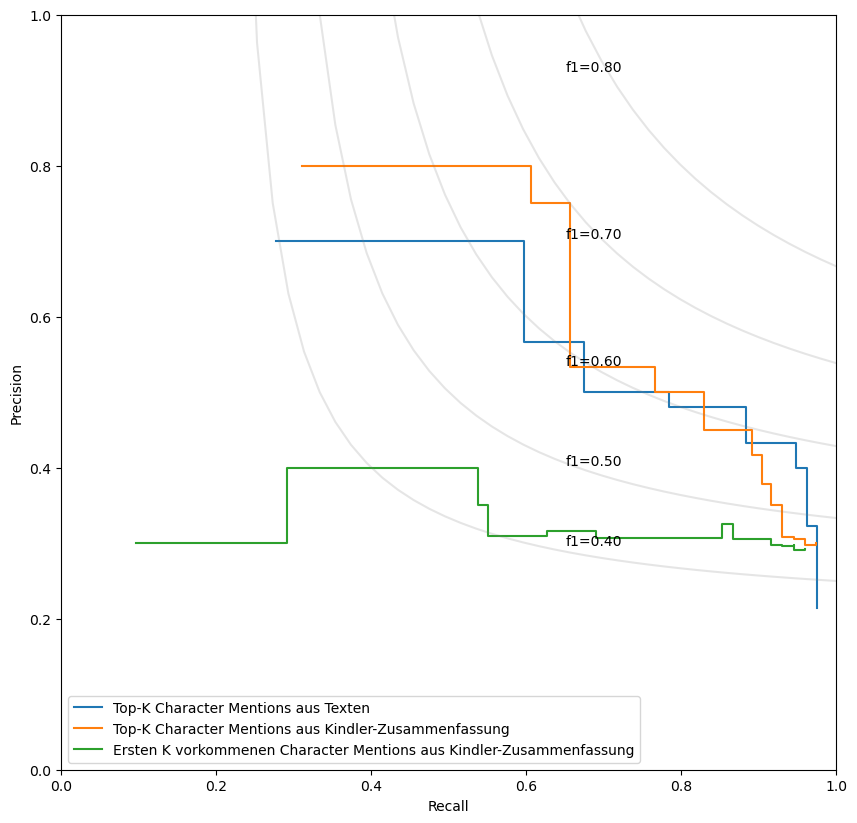

In [160]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
prs = []
recs = []

for _, row in text_mapping.iterrows():
    gold_chars = gold[gold.Titel == row.gold_name].Hauptfiguren_Goldstandard
    if len(gold_chars) == 0:
        print('missing', row.filename)
        continue
    gold_chars = gold_chars.item().split(', ')
    pred_chars = freq_texts[freq_texts.filename == row.filename].mention.tolist()
    
    pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
    prs.append(pr)
    recs.append(rec)

ax.plot(np.array(recs).mean(axis=0), np.array(prs).mean(axis=0), drawstyle="steps-post", label='Top-K Character Mentions aus Texten')


prs = []
recs = []

for _, row in text_mapping.iterrows():
    gold_chars = gold[gold.Titel == row.gold_name].Hauptfiguren_Goldstandard
    if len(gold_chars) == 0:
        print('missing', row.filename)
        continue
    gold_chars = gold_chars.item().split(', ')
    pred_chars = freq_summaries[freq_summaries.filename == row.filename_kindler].sort_values('freq', ascending=False).mention.tolist()
    
    pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
    prs.append(pr)
    recs.append(rec)
    print(pr[4],rec[4], row.gold_name)

ax.plot(np.array(recs).mean(axis=0), np.array(prs).mean(axis=0), drawstyle="steps-post", label='Top-K Character Mentions aus Kindler-Zusammenfassung')

prs = []
recs = []

for _, row in text_mapping.iterrows():
    gold_chars = gold[gold.Titel == row.gold_name].Hauptfiguren_Goldstandard
    if len(gold_chars) == 0:
        print('missing', row.filename)
        continue
    gold_chars = gold_chars.item().split(', ')
    pred_chars = freq_summaries[freq_summaries.filename == row.filename_kindler].sort_values('occurence_order', ascending=True).mention.tolist()
    
    pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
    prs.append(pr)
    recs.append(rec)

ax.plot(np.array(recs).mean(axis=0), np.array(prs).mean(axis=0), drawstyle="steps-post", label='Ersten K vorkommenen Character Mentions aus Kindler-Zusammenfassung')

f_scores = np.linspace(0.4, 0.8, num=5)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = ax.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax.annotate("f1={0:0.2f}".format(f_score), xy=(0.65, y[35] + 0.02))
    

ax.set_xlim([0.0, 1])
ax.set_ylim([0.0, 1])
ax.set(xlabel='Recall', ylabel='Precision')
plt.legend()
plt.show()